In [3]:
import pandas as pd
import numpy as np

In [4]:
# From http://www.ispdados.rj.gov.br/estatistica.html

# Convert empty cells to nan in order to have a numeric dtype for our columns

df = pd.read_csv('http://www.ispdados.rj.gov.br/Arquivos/DOMensalEstadoDesde1991.csv',sep=';',na_values=' ')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 56 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ano                         365 non-null    int64  
 1   mes                         365 non-null    int64  
 2   hom_doloso                  365 non-null    int64  
 3   lesao_corp_morte            269 non-null    float64
 4   latrocinio                  365 non-null    int64  
 5   cvli                        269 non-null    float64
 6   hom_por_interv_policial     281 non-null    float64
 7   letalidade_violenta         365 non-null    int64  
 8   tentat_hom                  365 non-null    int64  
 9   lesao_corp_dolosa           365 non-null    int64  
 10  estupro                     221 non-null    float64
 11  hom_culposo                 281 non-null    float64
 12  lesao_corp_culposa          269 non-null    float64
 13  roubo_transeunte            365 non

In [5]:
df['hom_por_interv_policial'].unique()

array([ nan,  18.,  23.,  35.,  41.,  38.,  24.,  32.,  29.,  10.,  25.,
        15.,  33.,  20.,  13.,  21.,  39.,  26.,  37.,  22.,  30.,  50.,
        43.,  46.,  47.,  52.,  57.,  53.,  45.,  42.,  48.,  86.,  63.,
        70.,  75.,  58.,  73.,  99., 105.,  66.,  90., 111., 113., 125.,
        96., 100.,  94., 102., 132.,  71.,  77.,  65.,  81.,  68., 103.,
        69., 114.,  72.,  59.,  67.,  93., 116., 119.,  95.,  92., 101.,
        89.,  88., 124.,  87., 117., 131., 137., 108., 127., 110.,  80.,
       109., 140., 147.,  62.,  74., 107.,  82.,  76.,  34.,  55.,  61.,
        19.,  49.,  44.,  31.,  36.,  27.,  56.,  83.,  54.,  78.,  84.,
        98.,  85., 123.,  97., 106., 157., 145., 155., 130., 176., 136.,
       159., 172., 153., 195., 173., 154., 146., 156., 164., 115., 179.,
        51., 148., 158., 142.])

In [6]:
# Make sure we have data points for our century

df[df['hom_por_interv_policial'].isna() & (df['ano'] > 1999)]

,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,...,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase


In [7]:
# Check the last month available

# last_month = max(df[df['ano'] == 2021]['mes'])

df[df['ano'] == 2021]


,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,...,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
360,2021,1,368,3.0,12,383.0,148.0,531,477,5322,...,808.0,50.0,4857.0,382.0,35,4.0,0.0,0.0,52352.0,3
361,2021,2,246,4.0,12,262.0,148.0,410,333,4489,...,820.0,34.0,4121.0,293.0,24,5.0,2.0,0.0,49018.0,3
362,2021,3,314,7.0,8,329.0,158.0,487,412,4728,...,1069.0,35.0,4535.0,328.0,23,2.0,2.0,0.0,54306.0,3
363,2021,4,301,4.0,7,312.0,142.0,454,337,3983,...,879.0,27.0,3889.0,277.0,19,6.0,3.0,0.0,47796.0,2
364,2021,5,266,2.0,6,274.0,111.0,385,340,4005,...,970.0,43.0,4028.0,287.0,29,2.0,1.0,1.0,49919.0,2


In [8]:
rank = pd.DataFrame(df[(df['ano'] > 2002)].groupby('ano').sum())

rank

,mes,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,...,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
ano,,,,,,,,,,,,,,,,,,,,,
2003,78,6624,56.0,179,6859.0,1195.0,8054,4124,78228,2577.0,...,0.0,0.0,69472.0,4800.0,1625,53.0,43.0,7.0,536163.0,36
2004,78,6438,39.0,185,6662.0,983.0,7645,3648,75008,2917.0,...,0.0,0.0,65343.0,4559.0,1230,48.0,50.0,0.0,550262.0,36
2005,78,6620,59.0,210,6889.0,1098.0,7987,3906,77949,3565.0,...,0.0,0.0,64921.0,4397.0,911,42.0,24.0,9.0,581416.0,36
2006,78,6323,55.0,208,6586.0,1063.0,7649,4022,75550,3200.0,...,8920.0,509.0,61800.0,4562.0,826,49.0,27.0,2.0,609251.0,36
2007,78,6133,44.0,192,6369.0,1330.0,7699,4087,73908,3222.0,...,10557.0,546.0,62606.0,4633.0,766,40.0,23.0,9.0,631684.0,36
2008,78,5717,45.0,235,5997.0,1137.0,7134,4055,73474,3846.0,...,10807.0,589.0,64853.0,5095.0,611,32.0,22.0,4.0,654745.0,36
2009,78,5793,44.0,221,6058.0,1048.0,7106,4472,79244,4120.0,...,11884.0,579.0,71242.0,5425.0,495,30.0,24.0,7.0,669716.0,36
2010,78,4767,50.0,156,4973.0,855.0,5828,4146,81076,4589.0,...,11975.0,483.0,76361.0,5473.0,545,28.0,15.0,5.0,674047.0,36
2011,78,4279,40.0,118,4437.0,523.0,4960,4242,84709,4871.0,...,15640.0,740.0,81273.0,5488.0,519,44.0,7.0,5.0,696275.0,36


In [9]:
rank['cop_killed'] = rank['pol_militares_mortos_serv'] + rank['pol_civis_mortos_serv']

In [10]:
# Not working
# ax = rank['hom_por_interv_policial'].plot(kind = 'line')

<AxesSubplot:xlabel='ano'>

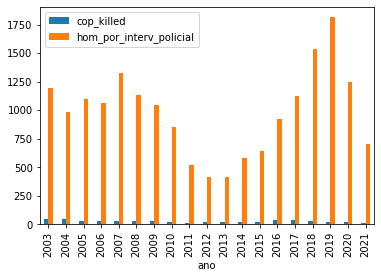

In [11]:
rank['hom_por_interv_policial'] = rank['hom_por_interv_policial'].astype(int)
rank['cop_killed'] = rank['cop_killed'].astype(int)

rank[['cop_killed','hom_por_interv_policial']].plot(kind='bar')

In [12]:
rank

,mes,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,...,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase,cop_killed
ano,,,,,,,,,,,,,,,,,,,,,
2003,78,6624,56.0,179,6859.0,1195,8054,4124,78228,2577.0,...,0.0,69472.0,4800.0,1625,53.0,43.0,7.0,536163.0,36,50
2004,78,6438,39.0,185,6662.0,983,7645,3648,75008,2917.0,...,0.0,65343.0,4559.0,1230,48.0,50.0,0.0,550262.0,36,50
2005,78,6620,59.0,210,6889.0,1098,7987,3906,77949,3565.0,...,0.0,64921.0,4397.0,911,42.0,24.0,9.0,581416.0,36,33
2006,78,6323,55.0,208,6586.0,1063,7649,4022,75550,3200.0,...,509.0,61800.0,4562.0,826,49.0,27.0,2.0,609251.0,36,29
2007,78,6133,44.0,192,6369.0,1330,7699,4087,73908,3222.0,...,546.0,62606.0,4633.0,766,40.0,23.0,9.0,631684.0,36,32
2008,78,5717,45.0,235,5997.0,1137,7134,4055,73474,3846.0,...,589.0,64853.0,5095.0,611,32.0,22.0,4.0,654745.0,36,26
2009,78,5793,44.0,221,6058.0,1048,7106,4472,79244,4120.0,...,579.0,71242.0,5425.0,495,30.0,24.0,7.0,669716.0,36,31
2010,78,4767,50.0,156,4973.0,855,5828,4146,81076,4589.0,...,483.0,76361.0,5473.0,545,28.0,15.0,5.0,674047.0,36,20
2011,78,4279,40.0,118,4437.0,523,4960,4242,84709,4871.0,...,740.0,81273.0,5488.0,519,44.0,7.0,5.0,696275.0,36,12


In [13]:
leap = [2000, 2004, 2008, 2012, 2016, 2020]

rk = rank

rk['days'] = np.where((rk.index.isin(leap)), '366', '365')

rk

,mes,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,...,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase,cop_killed,days
ano,,,,,,,,,,,,,,,,,,,,,
2003,78,6624,56.0,179,6859.0,1195,8054,4124,78228,2577.0,...,69472.0,4800.0,1625,53.0,43.0,7.0,536163.0,36,50,365
2004,78,6438,39.0,185,6662.0,983,7645,3648,75008,2917.0,...,65343.0,4559.0,1230,48.0,50.0,0.0,550262.0,36,50,366
2005,78,6620,59.0,210,6889.0,1098,7987,3906,77949,3565.0,...,64921.0,4397.0,911,42.0,24.0,9.0,581416.0,36,33,365
2006,78,6323,55.0,208,6586.0,1063,7649,4022,75550,3200.0,...,61800.0,4562.0,826,49.0,27.0,2.0,609251.0,36,29,365
2007,78,6133,44.0,192,6369.0,1330,7699,4087,73908,3222.0,...,62606.0,4633.0,766,40.0,23.0,9.0,631684.0,36,32,365
2008,78,5717,45.0,235,5997.0,1137,7134,4055,73474,3846.0,...,64853.0,5095.0,611,32.0,22.0,4.0,654745.0,36,26,366
2009,78,5793,44.0,221,6058.0,1048,7106,4472,79244,4120.0,...,71242.0,5425.0,495,30.0,24.0,7.0,669716.0,36,31,365
2010,78,4767,50.0,156,4973.0,855,5828,4146,81076,4589.0,...,76361.0,5473.0,545,28.0,15.0,5.0,674047.0,36,20,365
2011,78,4279,40.0,118,4437.0,523,4960,4242,84709,4871.0,...,81273.0,5488.0,519,44.0,7.0,5.0,696275.0,36,12,365


In [15]:
# https://calculat.io/en/date/days-between/01-january-2021--31-may-2021

rk.loc[rk.index == 2021, 'days'] = 150

rk



,mes,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,...,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase,cop_killed,days
ano,,,,,,,,,,,,,,,,,,,,,
2003,78,6624,56.0,179,6859.0,1195,8054,4124,78228,2577.0,...,69472.0,4800.0,1625,53.0,43.0,7.0,536163.0,36,50,365
2004,78,6438,39.0,185,6662.0,983,7645,3648,75008,2917.0,...,65343.0,4559.0,1230,48.0,50.0,0.0,550262.0,36,50,366
2005,78,6620,59.0,210,6889.0,1098,7987,3906,77949,3565.0,...,64921.0,4397.0,911,42.0,24.0,9.0,581416.0,36,33,365
2006,78,6323,55.0,208,6586.0,1063,7649,4022,75550,3200.0,...,61800.0,4562.0,826,49.0,27.0,2.0,609251.0,36,29,365
2007,78,6133,44.0,192,6369.0,1330,7699,4087,73908,3222.0,...,62606.0,4633.0,766,40.0,23.0,9.0,631684.0,36,32,365
2008,78,5717,45.0,235,5997.0,1137,7134,4055,73474,3846.0,...,64853.0,5095.0,611,32.0,22.0,4.0,654745.0,36,26,366
2009,78,5793,44.0,221,6058.0,1048,7106,4472,79244,4120.0,...,71242.0,5425.0,495,30.0,24.0,7.0,669716.0,36,31,365
2010,78,4767,50.0,156,4973.0,855,5828,4146,81076,4589.0,...,76361.0,5473.0,545,28.0,15.0,5.0,674047.0,36,20,365
2011,78,4279,40.0,118,4437.0,523,4960,4242,84709,4871.0,...,81273.0,5488.0,519,44.0,7.0,5.0,696275.0,36,12,365


In [16]:
rk['days'] = rk['days'].astype(int)

rk['avg'] = round(rk['hom_por_interv_policial'] / rk['days'],1)
rk['cop_avg'] = round(rk['cop_killed'] / rk['days'],1)



In [20]:
rk['lethality'] = rk['hom_por_interv_policial']/rk['cop_killed']

rk

,mes,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,...,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase,cop_killed,days,avg,cop_avg,lethality
ano,,,,,,,,,,,,,,,,,,,,,
2003,78,6624,56.0,179,6859.0,1195,8054,4124,78228,2577.0,...,53.0,43.0,7.0,536163.0,36,50,365,3.3,0.1,23.900000
2004,78,6438,39.0,185,6662.0,983,7645,3648,75008,2917.0,...,48.0,50.0,0.0,550262.0,36,50,366,2.7,0.1,19.660000
2005,78,6620,59.0,210,6889.0,1098,7987,3906,77949,3565.0,...,42.0,24.0,9.0,581416.0,36,33,365,3.0,0.1,33.272727
2006,78,6323,55.0,208,6586.0,1063,7649,4022,75550,3200.0,...,49.0,27.0,2.0,609251.0,36,29,365,2.9,0.1,36.655172
2007,78,6133,44.0,192,6369.0,1330,7699,4087,73908,3222.0,...,40.0,23.0,9.0,631684.0,36,32,365,3.6,0.1,41.562500
2008,78,5717,45.0,235,5997.0,1137,7134,4055,73474,3846.0,...,32.0,22.0,4.0,654745.0,36,26,366,3.1,0.1,43.730769
2009,78,5793,44.0,221,6058.0,1048,7106,4472,79244,4120.0,...,30.0,24.0,7.0,669716.0,36,31,365,2.9,0.1,33.806452
2010,78,4767,50.0,156,4973.0,855,5828,4146,81076,4589.0,...,28.0,15.0,5.0,674047.0,36,20,365,2.3,0.1,42.750000
2011,78,4279,40.0,118,4437.0,523,4960,4242,84709,4871.0,...,44.0,7.0,5.0,696275.0,36,12,365,1.4,0.0,43.583333


<AxesSubplot:xlabel='ano'>

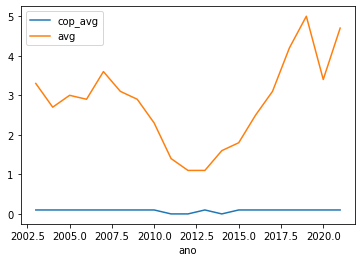

In [18]:
rk[['cop_avg','avg']].plot()

In [65]:
rk[12:-1]['cop_killed'].sum()

173

In [14]:
rk[12:-1]['hom_por_interv_policial'].sum()

7290

In [17]:
rk[12:-1]['cop_killed']

ano
2015    25
2016    40
2017    35
2018    32
2019    22
2020    19
Name: cop_killed, dtype: int64

<AxesSubplot:xlabel='ano'>

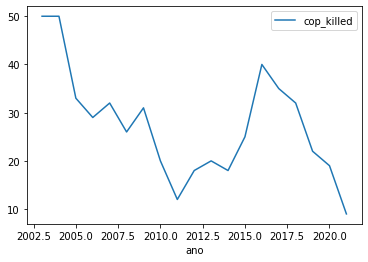

In [250]:
#Per year
rk[['cop_killed']].plot()

In [259]:
rk[['cop_avg','avg']].to_csv('rank.csv')